In [177]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load Dataframe

In [178]:
# Create DB Connection
conn = sqlite3.connect('data/bicycle_counter_factors_dataset.db')
# Query the database to retrieve the newest datetime value
query = "SELECT * FROM dataset"
result = conn.execute(query)
# Fetch all rows as a list of tuples
rows = result.fetchall()
# Get the column names from the cursor's description
columns = [description[0] for description in result.description]
# Create a DataFrame from the rows and column names
df = pd.DataFrame(rows, columns=columns)
# Close the database connection
conn.close()
# Show DataFrame
df.head()

,Datetime,100034978 (Gartenstraße),101034978 (Gartenstraße einwärts),102034978 (Gartenstraße auswärts),100034978-status,101034978-status,102034978-status,100031300 (Hafenstraße),101031300 (Channel 1 IN),102031300 (Channel 2 OUT),100031300-status,101031300-status,102031300-status,100034980 (Hammer Straße),101034980 (Hammer Straße stadteinwärts),102034980 (Hammer Straße stadtauswärts),100034980-status,101034980-status,102034980-status,100034982 (Hüfferstraße),101034982 (Hüfferstraße stadteinwärts),102034982 (Hüfferstraße stadtauswärts),100034982-status,101034982-status,102034982-status,100053305 (Kanalpromenade),101053305 (Kanalpromenade Fahrräder Richtung Osttor),102053305 (Kanalpromenade Fahrräder Richtung Zentrum),103053305 (Kanalpromenade Fahrräder Richtung Osttor),104053305 (Kanalpromenade Fahrräder Richtung Zentrum),100053305-status,101053305-status,102053305-status,103053305-status,104053305-status,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status,100031297 (Promenade),101031297 (Promenade Radfahrer FR Mauritztor),102031297 (Promenade Radfahrer FR Salzstraße),103031297 (Promenade Radfahrer FR Mauritztor),104031297 (Promenade Radfahrer FR Salzstraße),105031297 (Promenade Radfahrer FR Mauritztor),106031297 (Promenade Radfahrer FR Salzstraße),100031297-status,101031297-status,102031297-status,103031297-status,104031297-status,105031297-status,106031297-status,100034983 (Warendorfer Straße),101034983 (Warendorfer Straße stadteinwärts),102034983 (Warendorfer Straße stadtauswärts),100034983-status,101034983-status,102034983-status,100034981 (Weseler Straße),101034981 (Weseler Straße stadteinwärts),102034981 (Weseler Straße stadtauswärts),100034981-status,101034981-status,102034981-status,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,condition_code,is_holiday
0,2019-01-01 00:00,1,0.0,1.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,4.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,1
1,2019-01-01 00:15,9,1.0,8.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8,1.0,7.0,0,0.0,0.0,6,0.0,6,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,1.0,0.0,0.0,0.0,22.0,0.0,5.0,5.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,3.0,5.0,0,0.0,0.0,5,2,3,0,0,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0
2,2019-01-01 00:30,12,9.0,3.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,30,8.0,22.0,0,0.0,0.0,16,1.0,15,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,3.0,14.0,0.0,0.0,0.0,37.0,1.0,13.0,7.0,3.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,4.0,12.0,0,0.0,0.0,11,6,5,0,0,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0
3,2019-01-01 00:45,8,3.0,5.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18,6.0,12.0,0,0.0,0.0,16,3.0,13,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,14.0,42.0,0.0,0.0,0.0,47.0,3.0,12.0,14.0,6.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,10.0,11.0,0,0.0,0.0,6,1,5,0,0,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0
4,2019-01-01 01:00,11,2.0,9.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18,11.0,7.0,0,0.0,0.0,18,3.0,15,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,12.0,42.0,0.0,0.0,0.0,49.0,4.0,14.0,8.0,9.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,9.0,12.0,0,0.0,0.0,10,2,8,0,0,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0


In [179]:
print(columns)

['Datetime', '100034978 (Gartenstraße)', '101034978 (Gartenstraße einwärts)', '102034978 (Gartenstraße auswärts)', '100034978-status', '101034978-status', '102034978-status', '100031300 (Hafenstraße)', '101031300 (Channel 1 IN)', '102031300 (Channel 2 OUT)', '100031300-status', '101031300-status', '102031300-status', '100034980 (Hammer Straße)', '101034980 (Hammer Straße stadteinwärts)', '102034980 (Hammer Straße stadtauswärts)', '100034980-status', '101034980-status', '102034980-status', '100034982 (Hüfferstraße)', '101034982 (Hüfferstraße stadteinwärts)', '102034982 (Hüfferstraße stadtauswärts)', '100034982-status', '101034982-status', '102034982-status', '100053305 (Kanalpromenade)', '101053305 (Kanalpromenade Fahrräder Richtung Osttor)', '102053305 (Kanalpromenade Fahrräder Richtung Zentrum)', '103053305 (Kanalpromenade Fahrräder Richtung Osttor)', '104053305 (Kanalpromenade Fahrräder Richtung Zentrum)', '100053305-status', '101053305-status', '102053305-status', '103053305-status'

# Preprocessing

Set Datetime to Index

In [180]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index("Datetime", inplace=True)
df.head(1)

,100034978 (Gartenstraße),101034978 (Gartenstraße einwärts),102034978 (Gartenstraße auswärts),100034978-status,101034978-status,102034978-status,100031300 (Hafenstraße),101031300 (Channel 1 IN),102031300 (Channel 2 OUT),100031300-status,101031300-status,102031300-status,100034980 (Hammer Straße),101034980 (Hammer Straße stadteinwärts),102034980 (Hammer Straße stadtauswärts),100034980-status,101034980-status,102034980-status,100034982 (Hüfferstraße),101034982 (Hüfferstraße stadteinwärts),102034982 (Hüfferstraße stadtauswärts),100034982-status,101034982-status,102034982-status,100053305 (Kanalpromenade),101053305 (Kanalpromenade Fahrräder Richtung Osttor),102053305 (Kanalpromenade Fahrräder Richtung Zentrum),103053305 (Kanalpromenade Fahrräder Richtung Osttor),104053305 (Kanalpromenade Fahrräder Richtung Zentrum),100053305-status,101053305-status,102053305-status,103053305-status,104053305-status,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status,100031297 (Promenade),101031297 (Promenade Radfahrer FR Mauritztor),102031297 (Promenade Radfahrer FR Salzstraße),103031297 (Promenade Radfahrer FR Mauritztor),104031297 (Promenade Radfahrer FR Salzstraße),105031297 (Promenade Radfahrer FR Mauritztor),106031297 (Promenade Radfahrer FR Salzstraße),100031297-status,101031297-status,102031297-status,103031297-status,104031297-status,105031297-status,106031297-status,100034983 (Warendorfer Straße),101034983 (Warendorfer Straße stadteinwärts),102034983 (Warendorfer Straße stadtauswärts),100034983-status,101034983-status,102034983-status,100034981 (Weseler Straße),101034981 (Weseler Straße stadteinwärts),102034981 (Weseler Straße stadtauswärts),100034981-status,101034981-status,102034981-status,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,condition_code,is_holiday
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,0.0,1.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,4.0,5.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,1


Create Col Lists

In [181]:
weather_columns = ['temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'condition_code']
holiday_column = 'is_holiday'
weather_holiday_columns = weather_columns + [holiday_column]
counter_status_columns = [item for item in df.columns if item not in weather_holiday_columns]
counter_columns = [col for col in counter_status_columns if 'status' not in col]
status_columns = [col for col in counter_status_columns if 'status' in col]
additional_columns = []

print(f"Counter Cols: \n{counter_columns} \n\n Status Cols: \n{status_columns} \n\n  Weather Holiday Cols: \n{weather_holiday_columns}")

Counter Cols: 
['100034978 (Gartenstraße)', '101034978 (Gartenstraße einwärts)', '102034978 (Gartenstraße auswärts)', '100031300 (Hafenstraße)', '101031300 (Channel 1 IN)', '102031300 (Channel 2 OUT)', '100034980 (Hammer Straße)', '101034980 (Hammer Straße stadteinwärts)', '102034980 (Hammer Straße stadtauswärts)', '100034982 (Hüfferstraße)', '101034982 (Hüfferstraße stadteinwärts)', '102034982 (Hüfferstraße stadtauswärts)', '100053305 (Kanalpromenade)', '101053305 (Kanalpromenade Fahrräder Richtung Osttor)', '102053305 (Kanalpromenade Fahrräder Richtung Zentrum)', '103053305 (Kanalpromenade Fahrräder Richtung Osttor)', '104053305 (Kanalpromenade Fahrräder Richtung Zentrum)', '100035541 (Neutor)', '101035541 (Neutor stadteinwärts)', '102035541 (Neutor stadtauswärts)', '100031297 (Promenade)', '101031297 (Promenade Radfahrer FR Mauritztor)', '102031297 (Promenade Radfahrer FR Salzstraße)', '103031297 (Promenade Radfahrer FR Mauritztor)', '104031297 (Promenade Radfahrer FR Salzstraße)', 

**Missing Values for Counters**: We determine the number of consecutive missing values in each column of a DataFrame per each counter.

In [182]:
#create daily values for columns with NaN values in a DataFrame, and have the aggregated value for a day as NaN if any NaN values exist within that day
#total counter for whole day
df_daily = df[counter_status_columns].resample('D').apply(lambda x: np.nan if x.isnull().any() else x.sum())
df_daily.head()

,100034978 (Gartenstraße),101034978 (Gartenstraße einwärts),102034978 (Gartenstraße auswärts),100034978-status,101034978-status,102034978-status,100031300 (Hafenstraße),101031300 (Channel 1 IN),102031300 (Channel 2 OUT),100031300-status,101031300-status,102031300-status,100034980 (Hammer Straße),101034980 (Hammer Straße stadteinwärts),102034980 (Hammer Straße stadtauswärts),100034980-status,101034980-status,102034980-status,100034982 (Hüfferstraße),101034982 (Hüfferstraße stadteinwärts),102034982 (Hüfferstraße stadtauswärts),100034982-status,101034982-status,102034982-status,100053305 (Kanalpromenade),101053305 (Kanalpromenade Fahrräder Richtung Osttor),102053305 (Kanalpromenade Fahrräder Richtung Zentrum),103053305 (Kanalpromenade Fahrräder Richtung Osttor),104053305 (Kanalpromenade Fahrräder Richtung Zentrum),100053305-status,101053305-status,102053305-status,103053305-status,104053305-status,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status,100031297 (Promenade),101031297 (Promenade Radfahrer FR Mauritztor),102031297 (Promenade Radfahrer FR Salzstraße),103031297 (Promenade Radfahrer FR Mauritztor),104031297 (Promenade Radfahrer FR Salzstraße),105031297 (Promenade Radfahrer FR Mauritztor),106031297 (Promenade Radfahrer FR Salzstraße),100031297-status,101031297-status,102031297-status,103031297-status,104031297-status,105031297-status,106031297-status,100034983 (Warendorfer Straße),101034983 (Warendorfer Straße stadteinwärts),102034983 (Warendorfer Straße stadtauswärts),100034983-status,101034983-status,102034983-status,100034981 (Weseler Straße),101034981 (Weseler Straße stadteinwärts),102034981 (Weseler Straße stadtauswärts),100034981-status,101034981-status,102034981-status
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,601,274.0,327.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1731,745.0,986.0,0,0.0,0.0,858,306.0,552,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2710.0,1148.0,1562.0,0.0,0.0,0.0,3304.0,66.0,1288.0,499.0,341.0,1083.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1195,772.0,423.0,0,0.0,0.0,716,382,334,0,0,0
2019-01-02,2016,1210.0,806.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6308,2990.0,3318.0,0,0.0,0.0,3496,1643.0,1853,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5930.0,3041.0,2889.0,0.0,0.0,0.0,10038.0,74.0,4905.0,702.0,726.0,3585.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5407,3268.0,2139.0,0,0.0,0.0,2208,1392,816,0,0,0
2019-01-03,2018,1139.0,879.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5877,2757.0,3120.0,0,0.0,0.0,3184,1456.0,1728,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5948.0,2995.0,2953.0,0.0,0.0,0.0,10056.0,69.0,4978.0,628.0,683.0,3653.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5086,3097.0,1989.0,0,0.0,0.0,2234,1359,875,0,0,0
2019-01-04,1854,1086.0,768.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5989,2910.0,3079.0,0,0.0,0.0,3220,1508.0,1712,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6223.0,3297.0,2926.0,0.0,0.0,0.0,9743.0,74.0,4845.0,778.0,613.0,3399.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4965,2998.0,1967.0,0,0.0,0.0,2249,1375,874,0,0,0
2019-01-05,1370,773.0,597.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4671,2217.0,2454.0,0,0.0,0.0,2058,959.0,1099,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4724.0,2372.0,2352.0,0.0,0.0,0.0,6855.0,72.0,3287.0,697.0,564.0,2202.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4117,2426.0,1691.0,0,0.0,0.0,1346,847,499,0,0,0


In [183]:
# Iterate over each column in the DataFrame
for column in status_columns:
    # Find consecutive NaN values using groupby and cumsum
    consecutive_nans = df_daily[column].isnull().astype(int).groupby(df_daily[column].notnull().astype(int).cumsum()).sum()
    
    # Filter only the consecutive NaN counts greater than zero
    consecutive_nans = consecutive_nans[consecutive_nans > 0]
    
    # Print the column name and the number of consecutive NaN days
    if len(consecutive_nans) > 0:
        print(consecutive_nans)
        print("-"*60)

101034978-status
32      1
39      3
40      1
44      1
1088    1
1299    1
Name: 101034978-status, dtype: int64
------------------------------------------------------------
102034978-status
871     10
872     29
895      1
1085     1
1204     1
1448     1
1567     1
Name: 102034978-status, dtype: int64
------------------------------------------------------------
100031300-status
0       365
576       1
636       1
696       1
725       2
997       1
1147      1
Name: 100031300-status, dtype: int64
------------------------------------------------------------
101031300-status
0       365
576       1
636       1
696       1
725       2
997       1
1147      1
Name: 101031300-status, dtype: int64
------------------------------------------------------------
102031300-status
0       365
576       1
636       1
668       1
695       1
724       2
996       1
1146      1
Name: 102031300-status, dtype: int64
------------------------------------------------------------
101034980-status
972    

Num of Holidays in Dataset

In [184]:
num_holiday_rows = df[df['is_holiday'] == 1].shape[0]
print(f"Number of rows with is_holiday = 1: {num_holiday_rows}")


Number of rows with is_holiday = 1: 50


**Adjust Counter Columns:**
- we want only one total counter per street -> to keep it simple and increase comprehension
- also we want to make it clear when we have data problems at one counter: if any of the subcounters did not work at one day the whole day for the street counter will be NaN so we only work with good data

In [185]:
print(status_columns)
#Mapping
street_counter_mapping = {
    "100034978": {'status': ["100034978-status", "101034978-status", "102034978-status"]},
    "100031300": {'status': ["100031300-status", "101031300-status", "102031300-status"]},
    "100034980": {'status': ["100034980-status", "101034980-status", "102034980-status"]},
    "100034982": {'status': ["100034982-status", "101034982-status", "102034982-status"]},
    "100053305": {'status': ["100053305-status", "101053305-status", "102053305-status", "103053305-status", "104053305-status"]},
    "100035541": {'status': ["100035541-status", "101035541-status", "102035541-status"]},
    "100031297": {'status': ["100031297-status", "101031297-status", "102031297-status", "103031297-status", "104031297-status", "105031297-status", "106031297-status"]},
    "100034983": {'status': ["100034983-status", "101034983-status", "102034983-status"]},
    "100034981": {'status': ["100034981-status", "101034981-status", "102034981-status"]}
}
df_prep = df.copy()

#assign nan of any of sub-counters is nan
# Iterate over each key-value pair in the mapping dictionary
for key, value in street_counter_mapping.items():
    # Find the corresponding column name in the DataFrame
    column_name = next((col for col in df.columns if key in col), None)
    print(f"{key}- {column_name}")
    if column_name is not None:
        # Get the list of status columns from the mapping dictionary
        status_columns = value['status']
        #create daily status df
        daily_status_df = df[status_columns].resample('D').apply(lambda x: np.nan if x.isnull().any() else x.sum())
        # Create a boolean mask indicating which dates have NaN values in df2
        mask = daily_status_df.isna().any(axis=1)
        
        # Get unique dates in df1
        dates = pd.Index(df_prep.index.date).unique()
        # Iterate over dates
        for date in dates:
            # Check if any value in the corresponding row of df2 contains NaN
            if daily_status_df.loc[str(date)].isna().any():
                # Set values in specific column to NaN for that day in df1
                mask = df_prep.index.date == date
                df_prep.loc[mask, column_name] = np.nan

['100034978-status', '101034978-status', '102034978-status', '100031300-status', '101031300-status', '102031300-status', '100034980-status', '101034980-status', '102034980-status', '100034982-status', '101034982-status', '102034982-status', '100053305-status', '101053305-status', '102053305-status', '103053305-status', '104053305-status', '100035541-status', '101035541-status', '102035541-status', '100031297-status', '101031297-status', '102031297-status', '103031297-status', '104031297-status', '105031297-status', '106031297-status', '100034983-status', '101034983-status', '102034983-status', '100034981-status', '101034981-status', '102034981-status']
100034978- 100034978 (Gartenstraße)
100031300- 100031300 (Hafenstraße)
100034980- 100034980 (Hammer Straße)
100034982- 100034982 (Hüfferstraße)
100053305- 100053305 (Kanalpromenade)
100035541- 100035541 (Neutor)
100031297- 100031297 (Promenade)
100034983- 100034983 (Warendorfer Straße)
100034981- 100034981 (Weseler Straße)


In [186]:
#remove subcounters
counters = [key for key, value in street_counter_mapping.items() if isinstance(value, dict)]
counter_columns_to_keep = [col for col in counter_columns if any(substring in col for substring in counters)]
columns_to_keep = counter_columns_to_keep + weather_holiday_columns 
print(columns_to_keep)
df_prep = df_prep[columns_to_keep]


['100034978 (Gartenstraße)', '100031300 (Hafenstraße)', '100034980 (Hammer Straße)', '100034982 (Hüfferstraße)', '100053305 (Kanalpromenade)', '100035541 (Neutor)', '100031297 (Promenade)', '100034983 (Warendorfer Straße)', '100034981 (Weseler Straße)', 'temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'condition_code', 'is_holiday']


In [187]:
df_prep.head(10)

,100034978 (Gartenstraße),100031300 (Hafenstraße),100034980 (Hammer Straße),100034982 (Hüfferstraße),100053305 (Kanalpromenade),100035541 (Neutor),100031297 (Promenade),100034983 (Warendorfer Straße),100034981 (Weseler Straße),temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,condition_code,is_holiday
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1.0,NaN,0.0,0.0,NaN,9.0,3.0,1.0,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,1
2019-01-01 00:15:00,9.0,NaN,8.0,6.0,NaN,6.0,22.0,8.0,5,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0
2019-01-01 00:30:00,12.0,NaN,30.0,16.0,NaN,17.0,37.0,16.0,11,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0
2019-01-01 00:45:00,8.0,NaN,18.0,16.0,NaN,56.0,47.0,21.0,6,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0
2019-01-01 01:00:00,11.0,NaN,18.0,18.0,NaN,54.0,49.0,21.0,10,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0
2019-01-01 01:15:00,12.0,NaN,14.0,11.0,NaN,55.0,65.0,17.0,12,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0
2019-01-01 01:30:00,12.0,NaN,25.0,15.0,NaN,63.0,53.0,13.0,18,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0
2019-01-01 01:45:00,15.0,NaN,34.0,19.0,NaN,25.0,67.0,24.0,18,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0
2019-01-01 02:00:00,4.0,NaN,41.0,7.0,NaN,71.0,77.0,24.0,15,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,0


Add Weather Season as Feature

In [188]:
import pandas as pd

# Assuming your DataFrame is named 'df' with a datetime index
# You can use the 'month' and 'day' attributes of the datetime index to determine the weather season and day time

# Create weather_season column
df_prep['weather_season'] = pd.NaT

# Set the conditions for each season
conditions = [
    (df_prep.index.month >= 1) & (df_prep.index.month <= 2),  # Winter (January and February)
    (df_prep.index.month >= 3) & (df_prep.index.month <= 5),  # Spring (March, April, and May)
    (df_prep.index.month >= 6) & (df_prep.index.month <= 8),  # Summer (June, July, and August)
    (df_prep.index.month >= 9) & (df_prep.index.month <= 11), # Autumn/Fall (September, October, and November)
    (df_prep.index.month == 12)  # Winter (from December)
]

# Set the corresponding values for each condition
values = ['Winter', 'Spring', 'Summer', 'Autumn', 'Winter']

# Apply the conditions and values to create the 'weather_season' column
df_prep['weather_season'] = np.select(conditions, values)
additional_columns.append("weather_season")

In [189]:
df_prep.head(1)

,100034978 (Gartenstraße),100031300 (Hafenstraße),100034980 (Hammer Straße),100034982 (Hüfferstraße),100053305 (Kanalpromenade),100035541 (Neutor),100031297 (Promenade),100034983 (Warendorfer Straße),100034981 (Weseler Straße),temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,condition_code,is_holiday,weather_season
Datetime,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1.0,NaN,0.0,0.0,NaN,9.0,3.0,1.0,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN,1,Winter


Add Day Time as Feature

In [190]:

# Create day_time column
df_prep['day_time'] = pd.NaT

# Set the conditions for each day time
conditions = [
    (df_prep.index.hour >= 0) & (df_prep.index.hour < 6),   # Night 
    (df_prep.index.hour >= 6) & (df_prep.index.hour < 11),  # Morning 
    (df_prep.index.hour >= 11) & (df_prep.index.hour < 14),  # Morning 
    (df_prep.index.hour >= 14) & (df_prep.index.hour < 17), # Afternoon
    (df_prep.index.hour >= 17) & (df_prep.index.hour < 22), # Evening 
    (df_prep.index.hour >= 22)                              # Night 
]

# Set the corresponding values for each condition
values = ['Night', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Night']

# Apply the conditions and values to create the 'day_time' column
df_prep['day_time'] = np.select(conditions, values)
additional_columns.append("day_time")

Add Year as Feature

In [191]:
#add year as feature
df_prep['Year'] = df_prep.index.year
additional_columns.append("Year")

Add Total Traffic 

In [192]:
df_prep['total_traffic'] = df_prep[counter_columns_to_keep].sum(axis=1)

Explore Weather

In [193]:
df_prep[weather_columns].head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,condition_code
Datetime,,,,,,,,,,,
2019-01-01 00:00:00,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN
2019-01-01 00:15:00,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN
2019-01-01 00:30:00,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN
2019-01-01 00:45:00,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN
2019-01-01 01:00:00,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,None,NaN


Meteostat Weather Columns: 
| Order | Parameter | Description                               | Type    |
|-------|-----------|-------------------------------------------|---------|
| 1     | date      | The date string (format: YYYY-MM-DD)      | String  |
| 2     | hour      | The hour (UTC)                            | Integer |
| 3     | temp      | The air temperature in °C                 | Float   |
| 4     | dwpt      | The dew point in °C                       | Float   |
| 5     | rhum      | The relative humidity in percent (%)       | Integer |
| 6     | prcp      | The one-hour precipitation total in mm     | Float   |
| 7     | snow      | The snow depth in mm                       | Integer |
| 8     | wdir      | The wind direction in degrees (°)          | Integer |
| 9     | wspd      | The average wind speed in km/h             | Float   |
| 10    | wpgt      | The peak wind gust in km/h                 | Float   |
| 11    | pres      | The sea-level air pressure in hPa          | Float   |
| 12    | tsun      | The one-hour sunshine total in minutes (m) | Integer |
| 13    | coco      | The weather condition code                 | Integer |

In [194]:
# Find the datetime at which it stops being only NaN
first_valid_weather_datetime = df_prep[weather_columns].first_valid_index()
print("The first valid weather row datetime is:", first_valid_weather_datetime)

The first valid weather row datetime is: 2021-07-14 06:00:00


In [195]:
print("The first valid weather condition code:", df_prep["condition_code"].first_valid_index())

The first valid weather condition code: 2022-06-12 22:00:00


In [196]:
df_prep[weather_columns].loc[first_valid_weather_datetime:].head()


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,condition_code
Datetime,,,,,,,,,,,
2021-07-14 06:00:00,17.2,11.0,67.0,NaN,None,99.0,8.3,None,1017.5,None,NaN
2021-07-14 06:15:00,17.2,11.0,67.0,NaN,None,99.0,8.3,None,1017.5,None,NaN
2021-07-14 06:30:00,17.2,11.0,67.0,NaN,None,99.0,8.3,None,1017.5,None,NaN
2021-07-14 06:45:00,17.2,11.0,67.0,NaN,None,99.0,8.3,None,1017.5,None,NaN
2021-07-14 07:00:00,16.5,10.4,67.0,0.0,None,96.0,8.6,None,1017.7,None,NaN


select weather columns

In [197]:
selected_weather_cols = ["temp", "prcp", "wspd"]

## Resample

In [198]:
selected_cols = counter_columns_to_keep + selected_weather_cols + [holiday_column] + additional_columns
print(f"selected_cols: {selected_cols}")

selected_cols: ['100034978 (Gartenstraße)', '100031300 (Hafenstraße)', '100034980 (Hammer Straße)', '100034982 (Hüfferstraße)', '100053305 (Kanalpromenade)', '100035541 (Neutor)', '100031297 (Promenade)', '100034983 (Warendorfer Straße)', '100034981 (Weseler Straße)', 'temp', 'prcp', 'wspd', 'is_holiday', 'weather_season', 'day_time', 'Year']


Hourly Resample

In [199]:
# Resample the dataframe to have rows every hour
df_prep_hourly = df_prep.resample('1H').agg({**{col: 'sum' for col in counter_columns_to_keep + ["total_traffic"]},
                                  **{col: 'first' for col in selected_weather_cols + [holiday_column] + additional_columns}})

Daily Resample

In [200]:
df_prep_daily = df_prep_hourly.resample('D').agg({**{col: 'sum' for col in counter_columns_to_keep + ["prcp", "total_traffic"]},
                                  **{col: 'first' for col in ["weather_season", "is_holiday"]},
                                  **{col: 'median' for col in ["wspd", "temp"]}})

Weekly Resample

In [201]:
df_prep_weekly = df_prep_daily.resample('W').agg({**{col: 'sum' for col in counter_columns_to_keep + ["prcp", "total_traffic"]},
                                  **{col: 'first' for col in ["weather_season"]},
                                  **{col: 'median' for col in ["wspd", "temp"]}})

Monthly Resample

In [202]:
df_prep_monthly = df_prep_daily.resample('M').agg({**{col: 'sum' for col in counter_columns_to_keep + ["prcp", "total_traffic"]},
                                  **{col: 'first' for col in ["weather_season"]},
                                  **{col: 'mean' for col in ["wspd", "temp"]}})

# Visualization

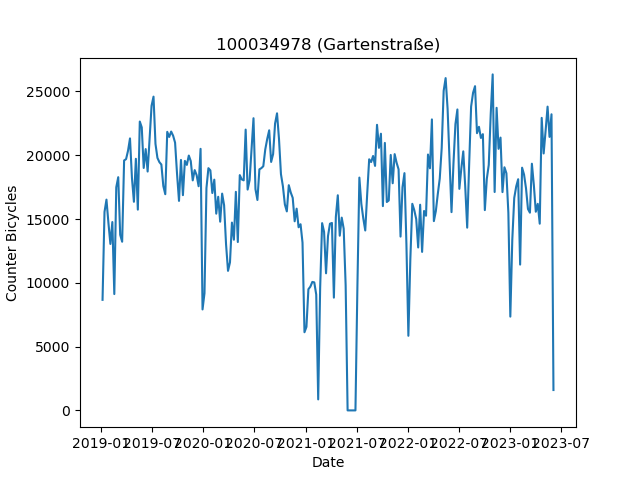

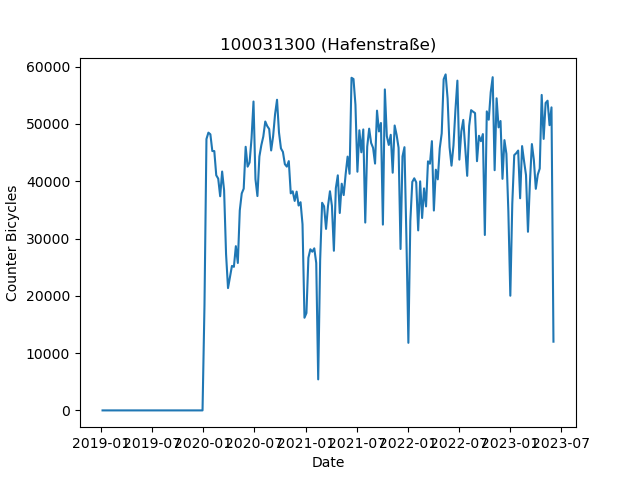

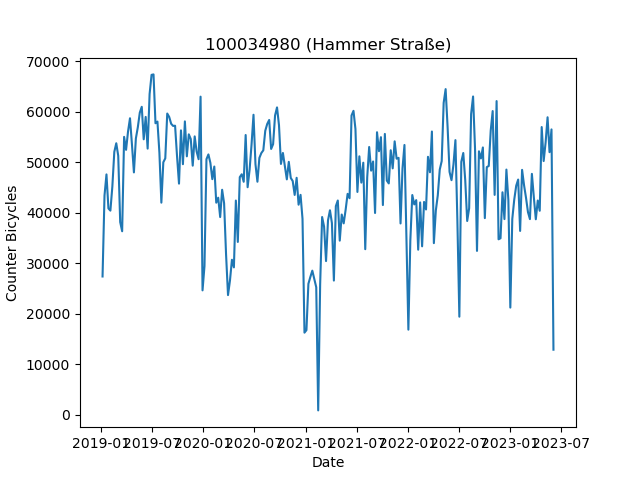

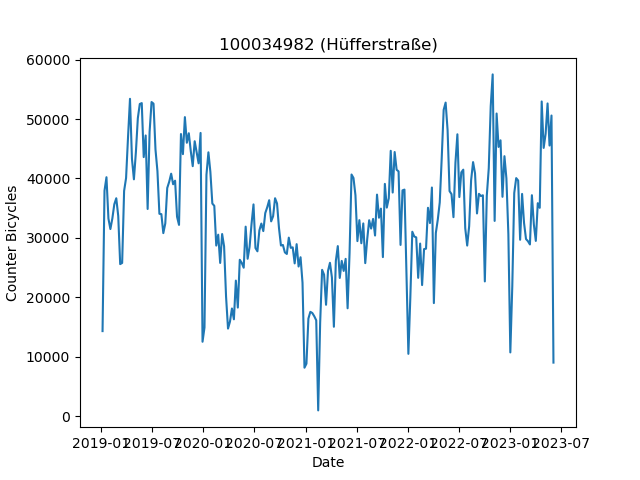

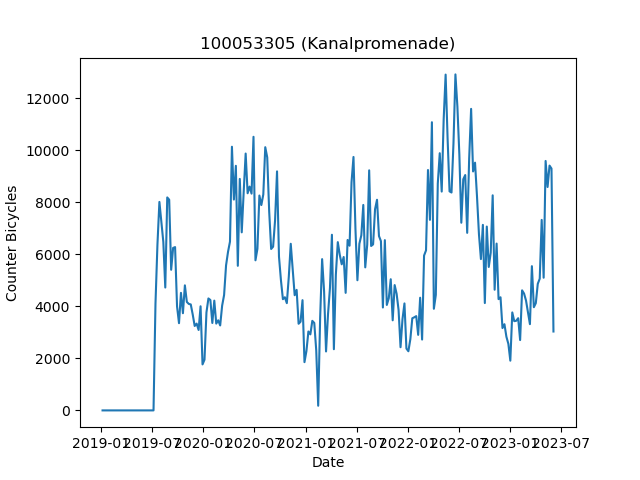

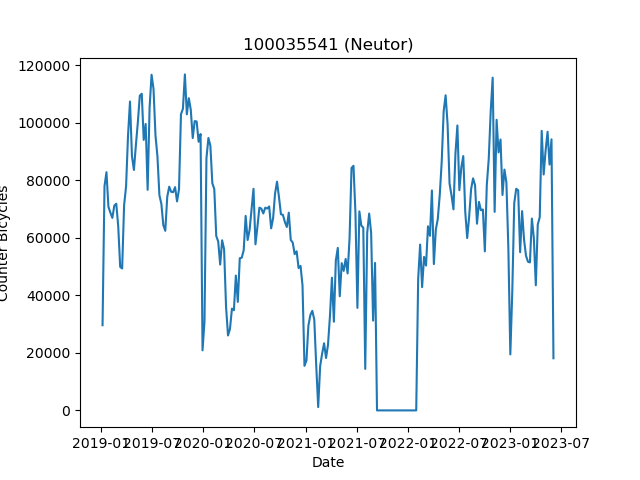

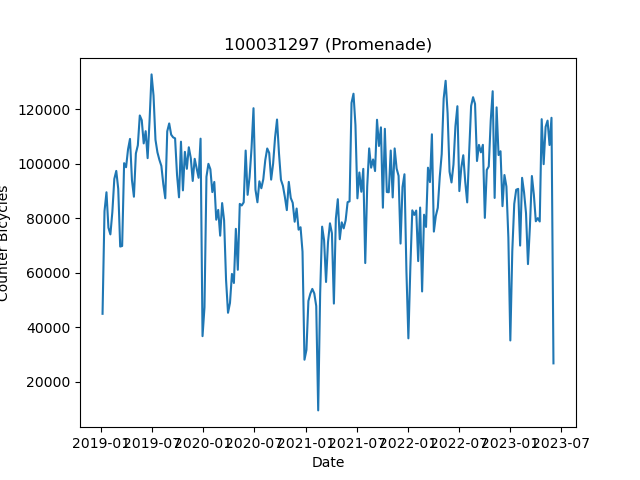

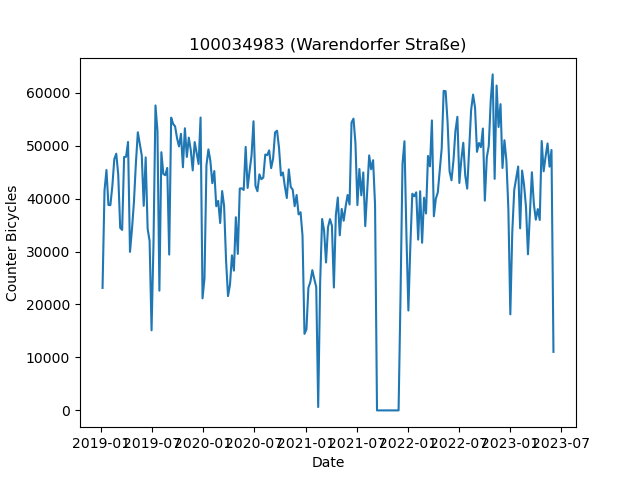

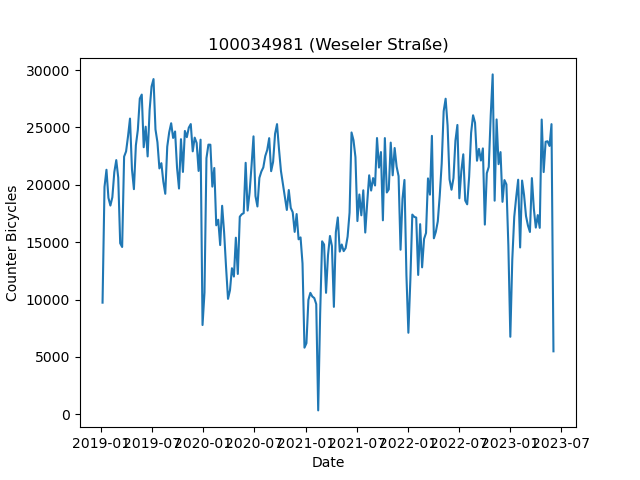

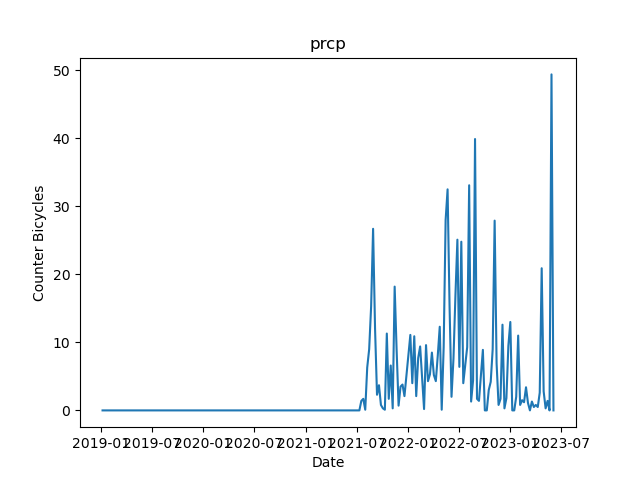

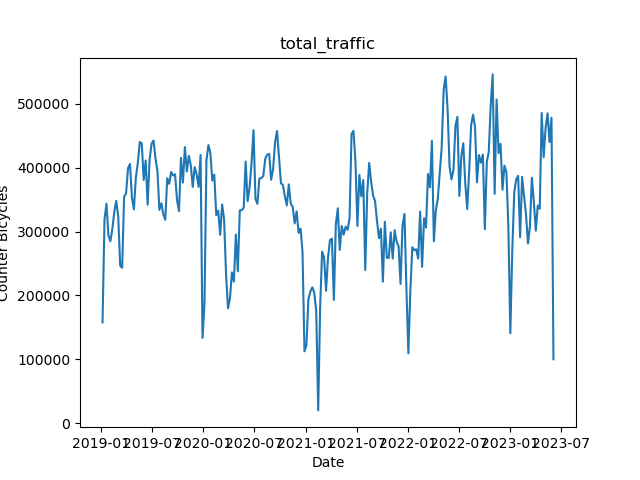

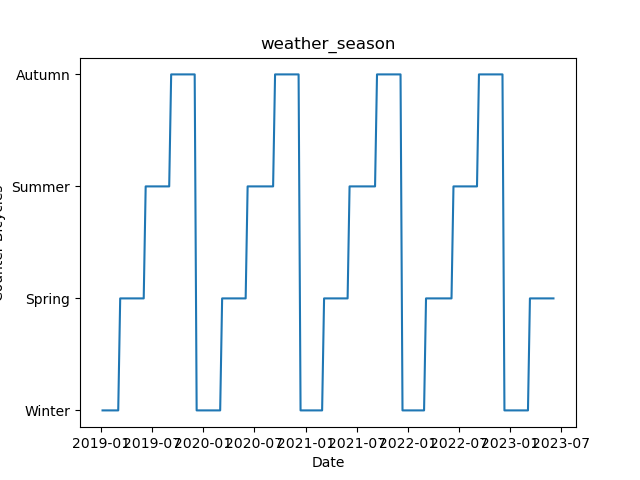

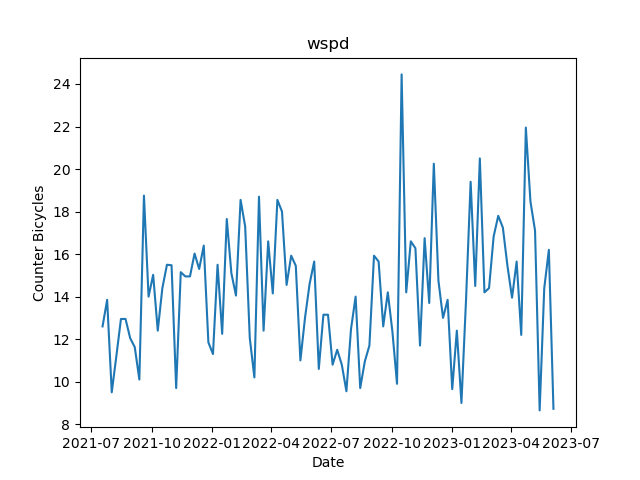

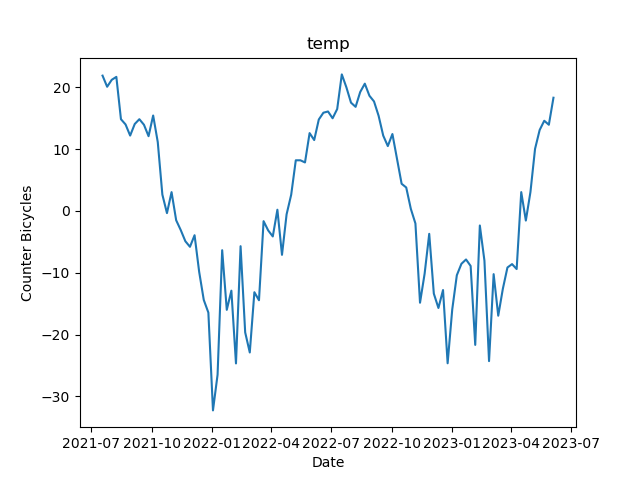

In [203]:
%matplotlib widget
# Create individual plots for each eligible column
for col in df_prep_weekly.columns:
    plt.figure()
    plt.plot(df_prep_weekly.index, df_prep_weekly[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Counter Bicycles')
    plt.show()


# Analysis

### Statistics

**Correlations**

In [204]:
#one hot encode weather-season
one_hot_encoded = pd.get_dummies(df_prep_hourly['weather_season'])

# Concatenate the one-hot encoded column with the original dataframe
df_prep_hourly_corr = pd.concat([df_prep_hourly, one_hot_encoded], axis=1)

# Drop the original column if desired
#df_prep_hourly.drop('weather_season', axis=1, inplace=True)

# Output the encoded dataframe
df_prep_hourly_corr.head(5)

,100034978 (Gartenstraße),100031300 (Hafenstraße),100034980 (Hammer Straße),100034982 (Hüfferstraße),100053305 (Kanalpromenade),100035541 (Neutor),100031297 (Promenade),100034983 (Warendorfer Straße),100034981 (Weseler Straße),total_traffic,temp,prcp,wspd,is_holiday,weather_season,day_time,Year,Autumn,Spring,Summer,Winter
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,30.0,0.0,56.0,38.0,0.0,88.0,109.0,46.0,22,389.0,NaN,NaN,NaN,1.0,Winter,Night,2019.0,0,0,0,1
2019-01-01 01:00:00,50.0,0.0,91.0,63.0,0.0,197.0,234.0,75.0,58,768.0,NaN,NaN,NaN,0.0,Winter,Night,2019.0,0,0,0,1
2019-01-01 02:00:00,54.0,0.0,174.0,47.0,0.0,302.0,315.0,96.0,66,1054.0,NaN,NaN,NaN,0.0,Winter,Night,2019.0,0,0,0,1
2019-01-01 03:00:00,44.0,0.0,152.0,81.0,0.0,302.0,288.0,123.0,42,1032.0,NaN,NaN,NaN,0.0,Winter,Night,2019.0,0,0,0,1
2019-01-01 04:00:00,29.0,0.0,93.0,53.0,0.0,328.0,190.0,53.0,62,808.0,NaN,NaN,NaN,0.0,Winter,Night,2019.0,0,0,0,1


/tmp/ipykernel_534/1516277959.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



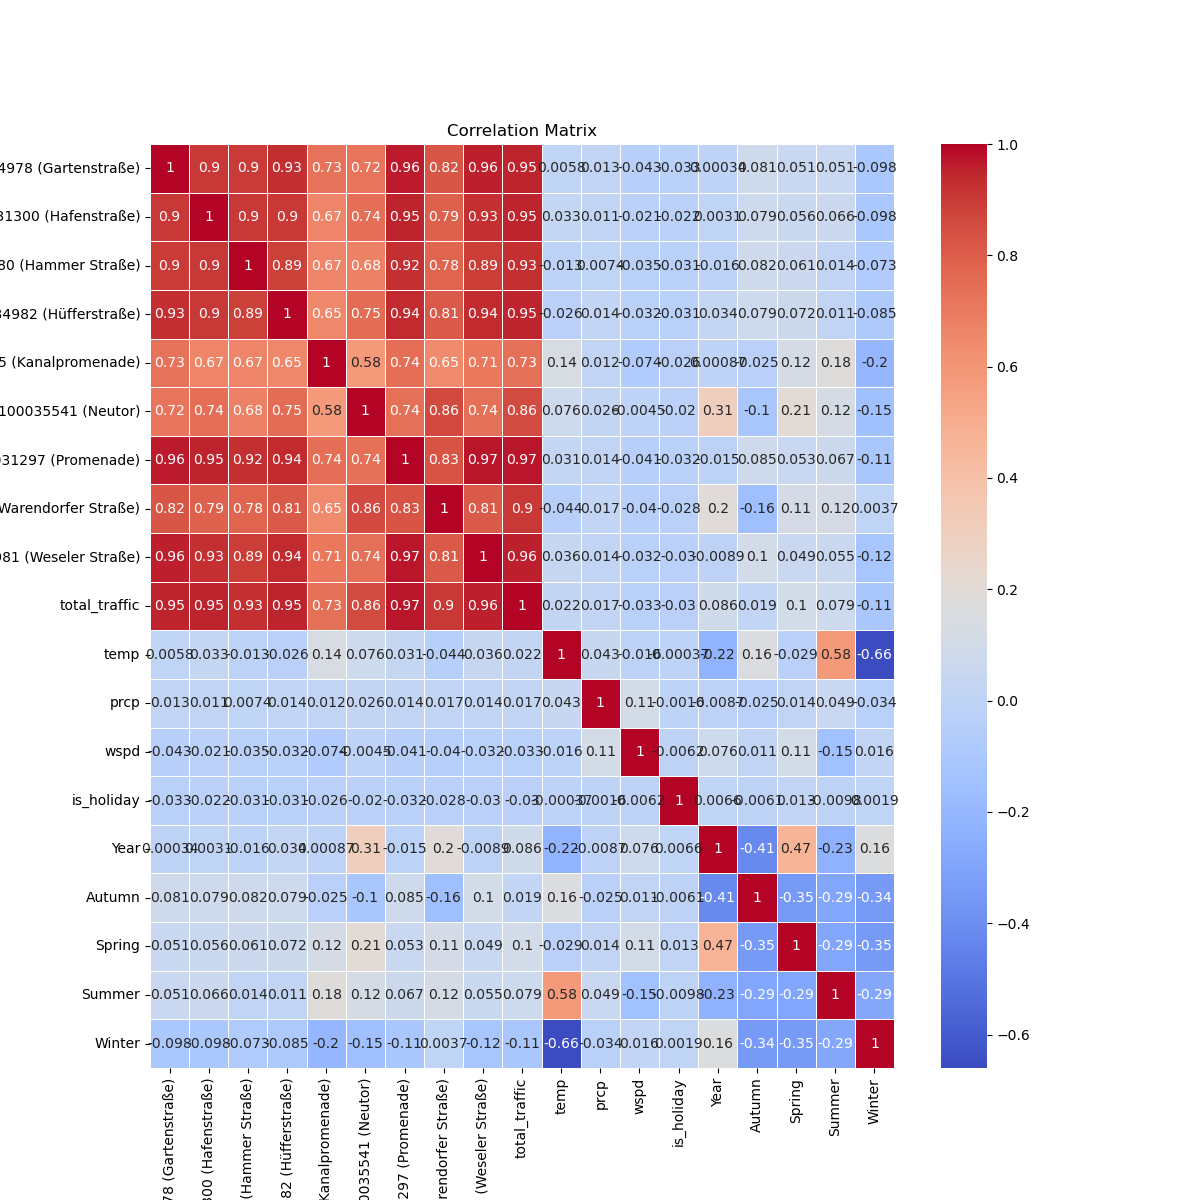

In [205]:
# Calculate the correlation matrix
correlation_matrix = df_prep_hourly_corr.loc[first_valid_weather_datetime:][df_prep_hourly_corr.columns].corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [206]:
df_prep_hourly.columns

Index(['100034978 (Gartenstraße)', '100031300 (Hafenstraße)',
       '100034980 (Hammer Straße)', '100034982 (Hüfferstraße)',
       '100053305 (Kanalpromenade)', '100035541 (Neutor)',
       '100031297 (Promenade)', '100034983 (Warendorfer Straße)',
       '100034981 (Weseler Straße)', 'total_traffic', 'temp', 'prcp', 'wspd',
       'is_holiday', 'weather_season', 'day_time', 'Year'],
      dtype='object')

In [207]:
coordinates_dict = {
    '100034978 (Gartenstraße)': {'latitude': 51.9728654, 'longitude': 7.6337276},
    '100031300 (Hafenstraße)': {'latitude': 51.9533373, 'longitude': 7.630871},
    '100034980 (Hammer Straße)': {'latitude': 51.9381516, 'longitude': 7.6222872},
    '100034982 (Hüfferstraße)': {'latitude': 51.9611592, 'longitude': 7.6060378},
    '100053305 (Kanalpromenade)': {'latitude': 51.913238, 'longitude': 7.6489407},
    '100035541 (Neutor)': {'latitude': 51.9696511, 'longitude': 7.5984053},
    '100031297 (Promenade)': {'latitude': 51.956623, 'longitude': 7.6190129},
    '100034983 (Warendorfer Straße)': {'latitude': 51.9719986, 'longitude': 7.68104},
    '100034981 (Weseler Straße)': {'latitude': 51.9275173, 'longitude': 7.5826767}
}

In [208]:
# Difference median summer, winter, autumn per counter per year
# Median Distribution of weekly count per Mo, Tu, Wed, ...
#Difference holidays count vs day/week before
# 

### Seasonal Decomposition:
decompose the bicycle traffic data into trend, seasonality, and residual components

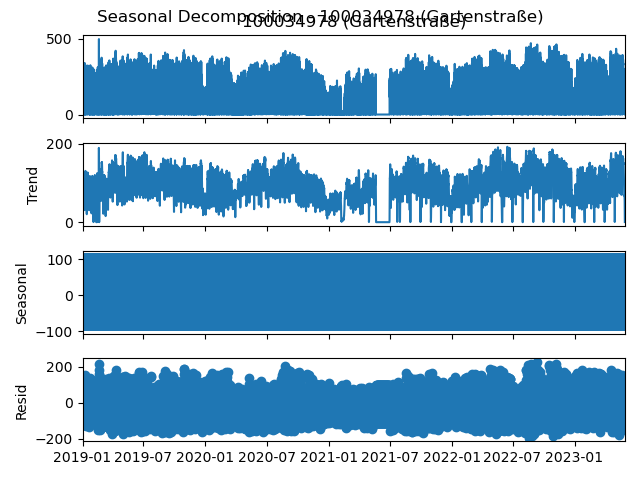

In [209]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on a specific counter
counter_name = "100034978 (Gartenstraße)"
counter_data = df_prep_hourly[counter_name].dropna()

# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(counter_data, model='additive')

# Plot the decomposition components
result.plot()
plt.suptitle(f"Seasonal Decomposition - {counter_name}")
plt.show()


In [210]:
df_prep_monthly.head()


,100034978 (Gartenstraße),100031300 (Hafenstraße),100034980 (Hammer Straße),100034982 (Hüfferstraße),100053305 (Kanalpromenade),100035541 (Neutor),100031297 (Promenade),100034983 (Warendorfer Straße),100034981 (Weseler Straße),prcp,total_traffic,weather_season,wspd,temp
Datetime,,,,,,,,,,,,,,
2019-01-31,65351.0,0.0,185428.0,148391.0,0.0,308774.0,344217.0,174794.0,82281,0.0,1309236.0,Winter,NaN,NaN
2019-02-28,57929.0,0.0,200907.0,139739.0,0.0,278669.0,364655.0,183048.0,83079,0.0,1308026.0,Winter,NaN,NaN
2019-03-31,71124.0,0.0,197385.0,137847.0,0.0,265437.0,363164.0,176853.0,80223,0.0,1292033.0,Spring,NaN,NaN
2019-04-30,83754.0,0.0,236688.0,202342.0,0.0,412756.0,435683.0,171142.0,100104,0.0,1642469.0,Spring,NaN,NaN
2019-05-31,87229.0,0.0,253479.0,215599.0,0.0,447288.0,485340.0,208987.0,112296,0.0,1810218.0,Spring,NaN,NaN


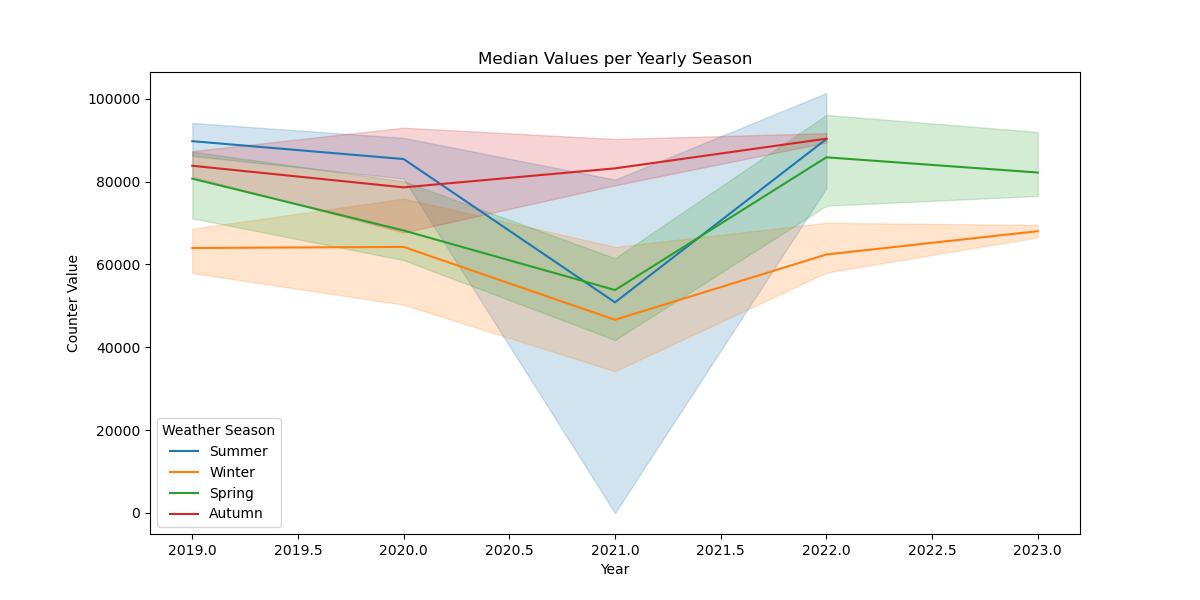

In [211]:
# Group the data by 'counter_name', 'weather_season', and 'year'
df_prep_monthly['Year'] = df_prep_monthly.index.year

grouped_data = df_prep_monthly.groupby([counter_name, 'weather_season', 'Year'])

median_values = grouped_data.median()
# Plot the median values
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_values, x='Year', y=counter_name, hue='weather_season')

plt.title('Median Values per Yearly Season')
plt.xlabel('Year')
plt.ylabel('Counter Value')
plt.legend(title='Weather Season')
plt.show()

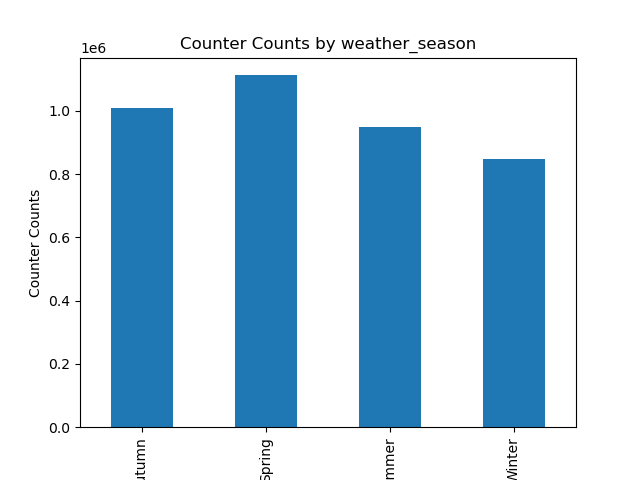

In [212]:
# Categorical Analysis
categorical_column = "weather_season"

# Group the data by the categorical column and calculate the sum of the counter values
categorical_counts = df_prep_hourly.groupby(categorical_column)[counter_name].sum()

# Plot the categorical counts
plt.figure()
categorical_counts.plot(kind='bar')
plt.title(f"Counter Counts by {categorical_column}")
plt.xlabel(categorical_column)
plt.ylabel("Counter Counts")
plt.show()


Categorical Analysis

Distribution of Traffic (all counters have missing data problems)

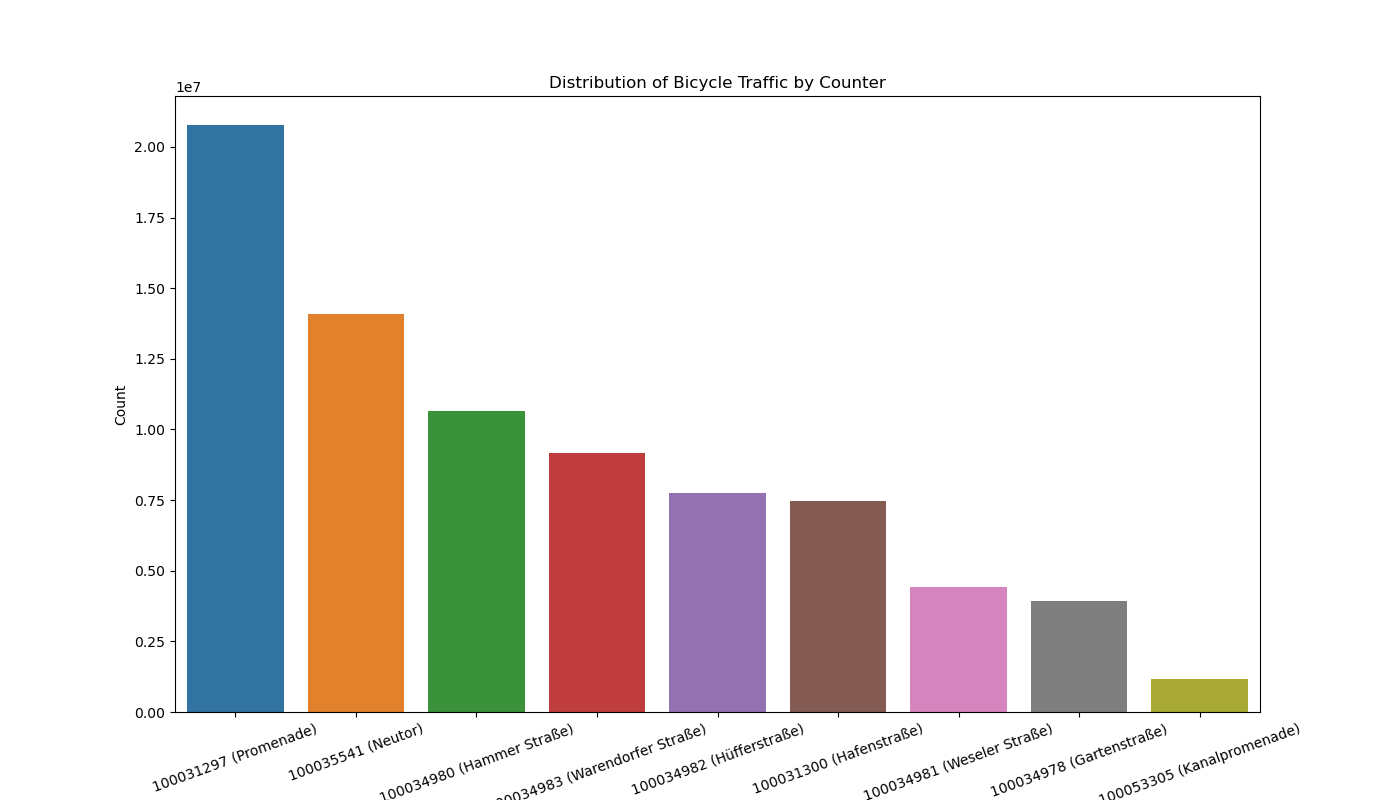

Counter with the most bicycle traffic: 100031297 (Promenade)
Counter with the least bicycle traffic: 100053305 (Kanalpromenade)
Total Count:
100031297 (Promenade)             20764360.0
100035541 (Neutor)                14096234.0
100034980 (Hammer Straße)         10647201.0
100034983 (Warendorfer Straße)     9165848.0
100034982 (Hüfferstraße)           7739414.0
100031300 (Hafenstraße)            7460270.0
100034981 (Weseler Straße)         4439586.0
100034978 (Gartenstraße)           3916491.0
100053305 (Kanalpromenade)         1179821.0
dtype: float64


In [213]:
# Calculate the sum of bicycle traffic for each counter
counter_sums = df_prep_monthly[counter_columns_to_keep].sum()

# Sort the counters based on the sum of bicycle traffic in descending order
sorted_counters = counter_sums.sort_values(ascending=False)
# Plot the distribution of bicycle traffic among counters
plt.figure(figsize=(14, 8))
sns.barplot(x=sorted_counters.index, y=sorted_counters.values)
plt.title('Distribution of Bicycle Traffic by Counter')
plt.xlabel('Counter')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

# Print the counter with the most and least bicycle traffic
most_traffic_counter = sorted_counters.index[0]
least_traffic_counter = sorted_counters.index[-1]
print(f"Counter with the most bicycle traffic: {most_traffic_counter}")
print(f"Counter with the least bicycle traffic: {least_traffic_counter}")
print("Total Count:")
print(sorted_counters)


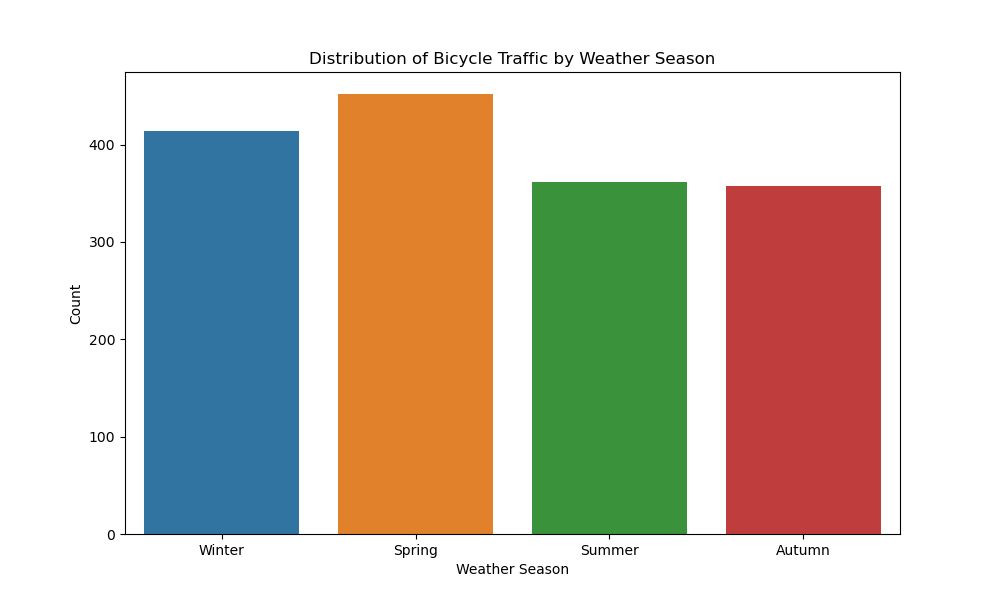

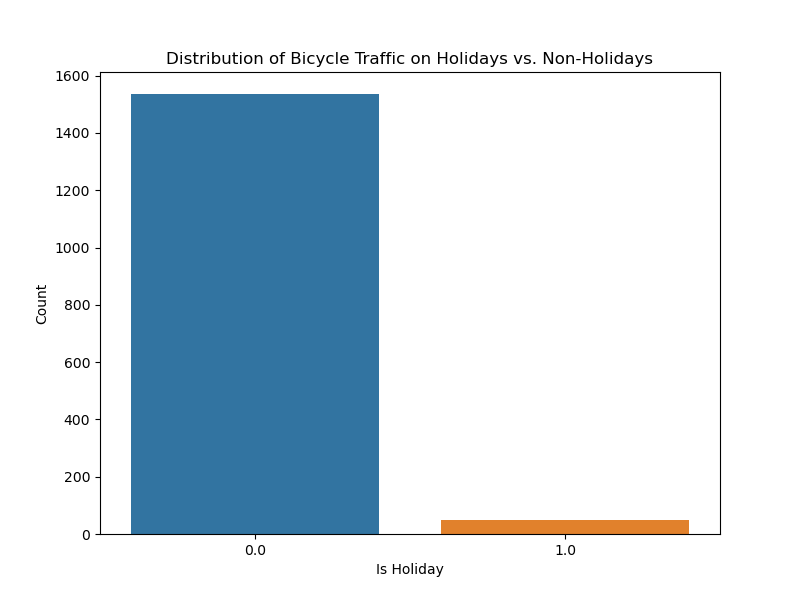

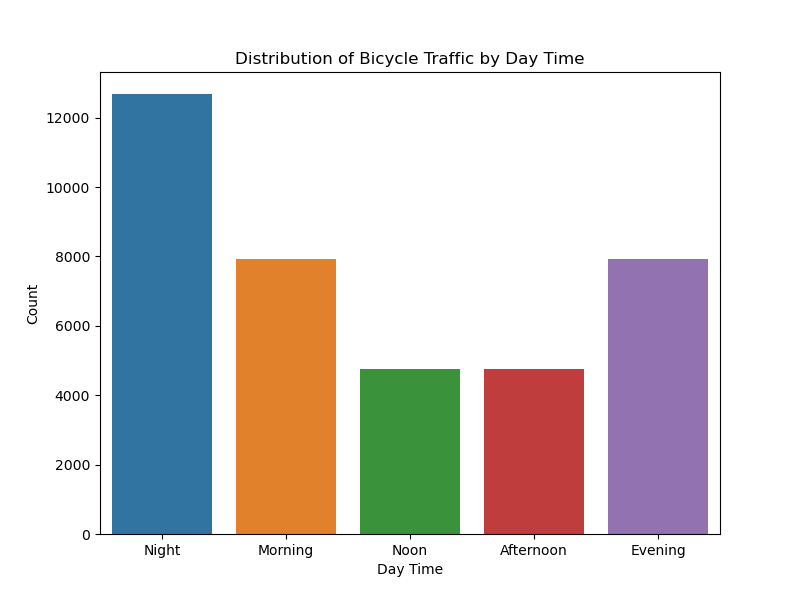

In [214]:
# Categorical analysis of weather variables

# Plot the distribution of bicycle traffic by weather season
plt.figure(figsize=(10, 6))
sns.countplot(data=df_prep_daily, x='weather_season')
plt.title('Distribution of Bicycle Traffic by Weather Season')
plt.xlabel('Weather Season')
plt.ylabel('Count')
plt.show()

# Plot the distribution of bicycle traffic on holidays vs. non-holidays
plt.figure(figsize=(8, 6))
sns.countplot(data=df_prep_daily, x='is_holiday')
plt.title('Distribution of Bicycle Traffic on Holidays vs. Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.show()

# Plot the distribution of bicycle traffic by day time
plt.figure(figsize=(8, 6))
sns.countplot(data=df_prep_hourly, x='day_time')
plt.title('Distribution of Bicycle Traffic by Day Time')
plt.xlabel('Day Time')
plt.ylabel('Count')
plt.show()

# Perform statistical tests or further analysis as needed to explore relationships between categorical variables and target variable

# For example, you can use ANOVA or t-tests to compare bicycle traffic among different counters or weather seasons



Bicycle Traffic on Holidays

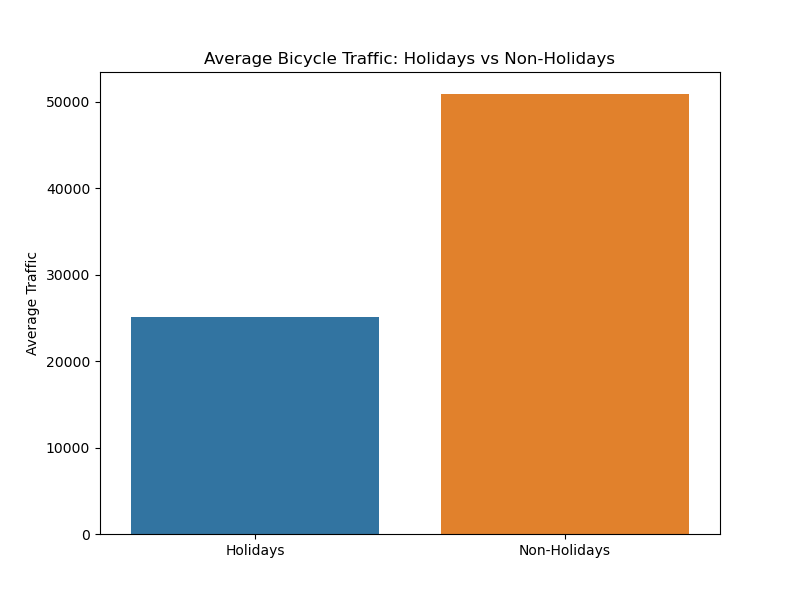

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average traffic for holidays and non-holidays
average_traffic_holidays = df_prep_daily[df_prep_daily['is_holiday'] == 1]['total_traffic'].mean()
average_traffic_non_holidays = df_prep_daily[df_prep_daily['is_holiday'] == 0]['total_traffic'].mean()

# Plot average traffic for holidays and non-holidays
plt.figure(figsize=(8, 6))
sns.barplot(x=['Holidays', 'Non-Holidays'], y=[average_traffic_holidays, average_traffic_non_holidays])
plt.title('Average Bicycle Traffic: Holidays vs Non-Holidays')
plt.ylabel('Average Traffic')
plt.show()


Impact of Bad Weather on Counters
- Bad Weather = precipitation of higher 0.1

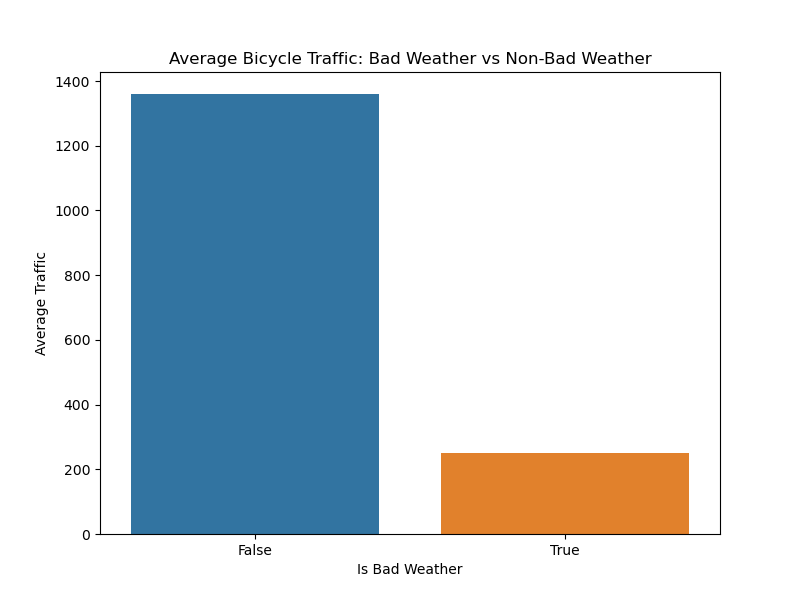

In [216]:
# Create a new column indicating if it was a bad weather day
df_prep_daily['is_bad_weather'] = df_prep_daily['prcp'] > 0.1  # Modify the threshold as per your definition of bad weather

# Group the data by 'is_bad_weather' and calculate the average traffic
traffic_by_weather = df_prep_daily.groupby('is_bad_weather')["total_traffic"].count()

# Plot the average traffic for bad weather versus non-bad weather
plt.figure(figsize=(8, 6))
sns.barplot(x=traffic_by_weather.index, y=traffic_by_weather.values)
plt.title('Average Bicycle Traffic: Bad Weather vs Non-Bad Weather')
plt.xlabel('Is Bad Weather')
plt.ylabel('Average Traffic')
plt.show()
